#Part 1: Climate Analysis and Exploration

In [66]:
#import modules
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import style
import matplotlib.pyplot as plt

#python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

from flask import Flask, jsonify

In [3]:
#Add database path and create engine
database_path = "/hawaii.sqlite"

engine = create_engine(f"sqlite://{database_path}")

In [4]:
#reflect an existing database into a new model
#use automap_base to reflect the database tables
Base = automap_base()
Base.prepare(engine, reflect=True)

# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [5]:
#Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

##Exploratory Precipitation Analysis

In [7]:
#Find the most recent date in the dataset.
dates = session.query(measurement.date).\
    group_by(measurement.date).\
    order_by((measurement.date).desc())

#Most recent date in dataset
dates[0]

('2017-08-23',)

In [8]:
for date in dates:
    print(date)

('2017-08-23',)
('2017-08-22',)
('2017-08-21',)
('2017-08-20',)
('2017-08-19',)
('2017-08-18',)
('2017-08-17',)
('2017-08-16',)
('2017-08-15',)
('2017-08-14',)
('2017-08-13',)
('2017-08-12',)
('2017-08-11',)
('2017-08-10',)
('2017-08-09',)
('2017-08-08',)
('2017-08-07',)
('2017-08-06',)
('2017-08-05',)
('2017-08-04',)
('2017-08-03',)
('2017-08-02',)
('2017-08-01',)
('2017-07-31',)
('2017-07-30',)
('2017-07-29',)
('2017-07-28',)
('2017-07-27',)
('2017-07-26',)
('2017-07-25',)
('2017-07-24',)
('2017-07-23',)
('2017-07-22',)
('2017-07-21',)
('2017-07-20',)
('2017-07-19',)
('2017-07-18',)
('2017-07-17',)
('2017-07-16',)
('2017-07-15',)
('2017-07-14',)
('2017-07-13',)
('2017-07-12',)
('2017-07-11',)
('2017-07-10',)
('2017-07-09',)
('2017-07-08',)
('2017-07-07',)
('2017-07-06',)
('2017-07-05',)
('2017-07-04',)
('2017-07-03',)
('2017-07-02',)
('2017-07-01',)
('2017-06-30',)
('2017-06-29',)
('2017-06-28',)
('2017-06-27',)
('2017-06-26',)
('2017-06-25',)
('2017-06-24',)
('2017-06-23',)
('2017-0

('2010-12-22',)
('2010-12-21',)
('2010-12-20',)
('2010-12-19',)
('2010-12-18',)
('2010-12-17',)
('2010-12-16',)
('2010-12-15',)
('2010-12-14',)
('2010-12-13',)
('2010-12-12',)
('2010-12-11',)
('2010-12-10',)
('2010-12-09',)
('2010-12-08',)
('2010-12-07',)
('2010-12-06',)
('2010-12-05',)
('2010-12-04',)
('2010-12-03',)
('2010-12-02',)
('2010-12-01',)
('2010-11-30',)
('2010-11-29',)
('2010-11-28',)
('2010-11-27',)
('2010-11-26',)
('2010-11-25',)
('2010-11-24',)
('2010-11-23',)
('2010-11-22',)
('2010-11-21',)
('2010-11-20',)
('2010-11-19',)
('2010-11-18',)
('2010-11-17',)
('2010-11-16',)
('2010-11-15',)
('2010-11-14',)
('2010-11-13',)
('2010-11-12',)
('2010-11-11',)
('2010-11-10',)
('2010-11-09',)
('2010-11-08',)
('2010-11-07',)
('2010-11-06',)
('2010-11-05',)
('2010-11-04',)
('2010-11-03',)
('2010-11-02',)
('2010-11-01',)
('2010-10-31',)
('2010-10-30',)
('2010-10-29',)
('2010-10-28',)
('2010-10-27',)
('2010-10-26',)
('2010-10-25',)
('2010-10-24',)
('2010-10-23',)
('2010-10-22',)
('2010-1

In [9]:
#Using this date '2017-08-23', retrieve the previous 12 months of precipitation data by 
#querying the 12 previous months of data.
prcp = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date <= '2017-08-23').\
    filter(measurement.date >= '2016-08-23').\
    group_by(measurement.date).\
    order_by((measurement.date).desc())


for date in prcp:
    print(date)

('2017-08-23', 0.0)
('2017-08-22', 0.0)
('2017-08-21', 0.0)
('2017-08-20', 0.0)
('2017-08-19', 0.0)
('2017-08-18', 0.0)
('2017-08-17', 0.0)
('2017-08-16', 0.0)
('2017-08-15', 0.02)
('2017-08-14', 0.0)
('2017-08-13', 0.0)
('2017-08-12', 0.0)
('2017-08-11', 0.0)
('2017-08-10', 0.0)
('2017-08-09', 0.0)
('2017-08-08', 0.0)
('2017-08-07', 0.0)
('2017-08-06', 0.0)
('2017-08-05', 0.0)
('2017-08-04', 0.02)
('2017-08-03', 0.0)
('2017-08-02', 0.0)
('2017-08-01', 0.02)
('2017-07-31', 0.0)
('2017-07-30', 0.0)
('2017-07-29', 0.0)
('2017-07-28', 0.0)
('2017-07-27', 0.0)
('2017-07-26', 0.0)
('2017-07-25', 0.0)
('2017-07-24', 0.05)
('2017-07-23', 0.0)
('2017-07-22', 0.03)
('2017-07-21', 0.0)
('2017-07-20', 0.03)
('2017-07-19', 0.0)
('2017-07-18', 0.05)
('2017-07-17', 0.03)
('2017-07-16', 0.02)
('2017-07-15', 0.0)
('2017-07-14', 0.02)
('2017-07-13', 0.07)
('2017-07-12', 0.0)
('2017-07-11', 0.0)
('2017-07-10', 0.0)
('2017-07-09', 0.0)
('2017-07-08', 0.0)
('2017-07-07', 0.0)
('2017-07-06', 0.0)
('2017-07

In [10]:
#Load query results into a Pandas DataFrame, and set the index to the date column
prcp_df = pd.DataFrame(data = prcp)
df = prcp_df.set_index('date')
df.tail()

,prcp
date,
2016-08-27,0.00
2016-08-26,0.00
2016-08-25,0.08
2016-08-24,0.08
2016-08-23,0.00


Text(0.5, 0, 'Date')

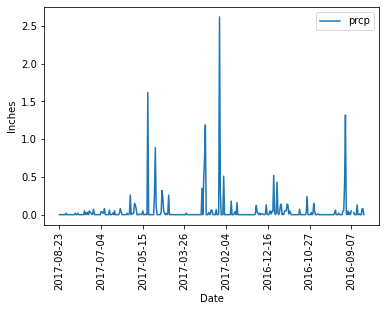

In [11]:
#Plot results
prcp_df.plot(x='date', y = 'prcp', rot = 90)
plt.ylabel('Inches')
plt.xlabel('Date')

In [12]:
#summary statistics for the precipitation data.
prcp_df.describe()

,prcp
count,364.000000
mean,0.048709
std,0.204930
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


Station Analysis

In [14]:
#A query to calculate the total number of stations in the dataset.
num_of_stations = session.query(func.count(station.station)).all()
num_of_stations

[(9,)]

In [22]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_activity = session.query(measurement.station, func.count(measurement.station)).\
                        group_by(measurement.station).\
                        order_by(func.count(measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, 
#and average temperature.
most_active_station = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
                        filter(measurement.station == 'USC00519281').all()

#The min, max, mean temperature for the 
most_active_station


[(54.0, 85.0, 71.66378066378067)]

In [46]:
# Query the last 12 months of temperature observation data for this most active station id
# Most active station id == 'USC00519281'

temperature_data = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date  <= '2017-08-23').\
    filter(measurement.date >= '2016-08-23')

temperature_df = pd.DataFrame(data = temperature_data, columns=['tobs'])
temperature_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


In [47]:
#check the frequency of times a temperature was recorded
temperature_df["tobs"].value_counts()

74.0    39
75.0    33
76.0    33
77.0    31
78.0    22
72.0    22
70.0    22
69.0    19
73.0    18
79.0    18
71.0    18
67.0    15
68.0    12
80.0    11
65.0     7
62.0     6
66.0     5
63.0     4
81.0     4
64.0     3
59.0     3
82.0     3
60.0     2
61.0     1
83.0     1
Name: tobs, dtype: int64

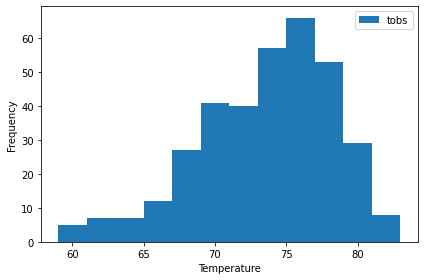

In [50]:
#plot the results as a histogram with 12 bins
temperature_df.plot.hist(bins = 12)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()

In [56]:
#close out your session at the end of your notebook.
session.close()